# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project 2 : Build a Traffic Sign Recognition Classifier

The goals / steps of this project are the following:
1.  Load the data set
2.  Explore, summarize and visualize the data set
3.  Design, train and test a model architecture
4.  Use the model to make predictions on new images
5.  Analyze the softmax probabilities of the new images
6.  Summarize the results with a written report

### Outline:

1.  First part of notebook contains project questions and answers.
2.  Second part of notebook contains project code

[//]: # (Image References)
[image1]: ./examples/grayscale.png
[image2]: ./examples/random_noise.jpg
[image3]: ./examples/LeNet.jpg
[image4]: ./examples/visualization.jpg
[image5]: ./examples/logits.png

---

### Project Writeup by Albert Vo
---
Once you have completed the code implementation, document your results in a project writeup using this template as a guide. The writeup can be in a markdown or pdf file. 

This P2 Traffic Classifier Notebook represents my project code and also my project writeup. 
References and Attributions:
1.  Albert Vo Code and Writeup 
2.  Udacity Course Material
3.  Jessica Yung Github
4.  Jeremy Shannon Github
5.  Vivek Yadav Github

### Question 1
Describe how you preprocessed the data. Why did you choose that technique?
Answer:

For preprocessing, I used the following techniques:
1.  Normalization
2.  Standardization (Center_normalize)
2.  RGB to Gray Scale Conversion


I started with normalization where I take the image value and normalize the value so it is between .1 and .9. Basically, I'm rescaling the data so that it falls into the range of 0 and 1.

Later, I changed to Standardizing the data (center_normalize) so that the image data had mean zero and equal variance. 

For gray scale conversion, I used OpenCV color conversion from RGB to gray scale.  The idea is that since the main feature of the traffic sign are in the shape of the signs, I can reduce the training time by converting to gray scale and reducing the number of color channels from 3 to 1.

 

### Question 2
Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset? 


Answer:
I explored that dataset and noticed that some traffic sign images had fewer samples than others. 

Since having traffic signs that had under-represented samples would reduce the accuracy of the model because the model would skew towards the signs that had more samples, I decided to augment the data by adding more samples for the under-represented traffic signs. 

I augmented the under-represented signs with generated images by randomly rotating the original image between 10-25 degrees left and 10-25 degrees right.  

I also augmented the data by adding images with different levels of brightness.  For brightness, I converted the image from RGB to HSV color space, applied a randomly generated brightness value and then converted the image from HSV back to RGB.


### Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom. Answer:

###My final model architecture consisted of the following model type, layers, layer sizes, connectivity.

-Modified LeNet 5 Model
1. Layer 1: Convolutional. Input = 32x32x1 RGB Image. Output = 28x28x6.
2. Layer 2: Convolutional. Output = 10x10x16.
3. Layer 3: Fully Connected. Input = 400. Output = 120.      
4. Layer 4: Fully Connected. Input = 120. Output = 84.  
5. Layer 5 Fully Connected. Input = 84. Output = 43.
 
 
-Modified LeNet 5 Network
--Layer Details
 1. Layer 1: Convolutional. 
    --Input = 32x32x1 RGB Image. Output = 28x28x6.  
    --Activation = RELU    
    --Pooling. Input = 28x28x6. Output = 14x14x6.
 2. Layer 2: Convolutional. Output = 10x10x16.
    --Activation = RELU
    --Pooling. 
    --Input = 10x10x16. Output = 5x5x16.
    --Flatten to get to fully connected layers. 
    --Input = 5x5x16. Output = 400.
 3. Layer 3: Fully Connected. 
    --Input = 400. Output = 120.      
    --Activation = RELU
    --Dropout = 0.5
 4. Layer 4: Fully Connected. 
    --Input = 120. Output = 84.  
    --Activation = RELU    
    --Dropout = 0.5
 5. Layer 5 Fully Connected. 
    --Input = 84. Output = 43 (43 traffic sign classes)
 
### Pipeline (Images)
[//]: # (Image References)
[image1]: ./examples/grayscale.png
[image2]: ./examples/random_noise.jpg
[image3]: ./examples/LeNet.jpg
[image4]: ./examples/visualization.jpg
[image5]: ./examples/logits.png


### LetNet Architecture Diagram
Note:  This diagram is used for Illustration Purposes Only:
This example is for classifying numbers and not traffic signs.
---
![alt text][image3]

### Question 4
How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

Answer: I trained the CNN model using the following optimizer, batch size and hyperparameters.
1.  Optimizer = Adam 
2.  Batch Size = 150 
3.  epochs = 20 
4.  learning rate = 0.005 
5.  mu = 0 
6.  sigma = 0.1 
7.  dropout = 0.5

### Question 5
What approach did you take in coming up with a solution to this problem? 
Answer:
The approach I took is a process of experimentation and comparing results to previous runs to see if there's improvement. I experimented with different hyperparameter values, but the main ones I worked with was the number of epochs and batch_size.  I looked at the validation to assess how well the model is performing.  

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.  

Since I got high accuracy on both my training set and my validation set, I concluded that my model was not underfitting or overfitting.  This conclusion was supported by the fact that my model was able to predict with 100% on the 5 NEW traffic signs it had not seen before.  This meant that it could generalize and was not overfitting to the training data set.

### Question 6
Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook. 

Answer:

Here I chose 5 candidate images of traffic signs:
1.  No Entry
2.  Stop
3.  Speed Limit 60 km/h
4.  Road Work
5.  Wild Animal Crossing

Some qualities that may make some signs more difficult to classify are similarities in shape.  For instance, both Road Work and Wild Animal Crossing have a triangle shape and both No Entry and Speed Limit have a circular shape.  

Another quality that may make signs difficult are brightness or darkness of the image.  If the lighting is dark, the classifier may have trouble distinguishing between different letters in signs.  For instance, for the Speed Limit 60 km/h sign, the classifier could incorrectly predict Speed Limit 50 km/h.




### Question 7
Is your model able to perform equally well on captured pictures when compared to testing on the dataset? 
The simplest way to do this check the accuracy of the predictions. 
For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.

Answer:

I got a 95.0% validation accuracy and 92.4% test accuracy.  My model predict all 5 signs I fed it correctly for an accuracy of 100%.  I did not have any preference in the 5 Traffic Signs I chose.  The main criteria I used for selecting signs was that the sign was relatively easy to figure out from the image itself.

I also used the signnames.csv to check the accuracy manually. Since it had a mapping from the class id (0-42) to the corresponding sign name, I used the class id the model outputs, then looked up the name in signnames.csv to see if it matched the sign from the image.


 



### Question 8
Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here. Which predictions is the model certain of? Uncertain? 

Answer:

I used Top_k=3 to get the top 3 Softmax probabilities.

tf.nn.top_k will return the values and indices (class ids) of the top k predictions. For top_k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

I used the model's softmax probabilities to visualize the certainty of its prediction. 


When I was experimenting with using both normalization and standardization, I got 80% accuracy prediction where the classifier only predicted 4 out of 5 new images correctly.  The thing that surprised me was not that it got one prediction wrong.  The thing that surprised me was that it got the most well-known traffic sign wrong:  the Stop sign.
To improve prediction results on new images, I experimented just using standardization (center_normalize) and as a result, I got 100% accuracy where the classifier all 5 new traffic signs correctly. 

When the model was incorrect in its initial prediction for the Stop Sign, the correct prediction still appeared in the top k.  In fact, the correct prediction appeared as the 2nd prediction, so it meant that it still was close enough.  

In terms of the softmax probabilties and confidence, for 3 of the Traffic Signs (Speed Limit: 60 km/h, Road Work and Wild Animal Crossing, the model Top Prediction had 100% softmax probability indicating certainty.  For one of the sign, No Entry, the model's Top Prediction had 99% softmax probability indicating near certainty.  But for one of the sign, the Stop Sign, the model's Top Prediction had a 94% softmax probability, which meant for some reason it had less confidence for the Stop Sign, even though the Stop Sign unique shape should make it even easier to classify with 100% confidence.








---
## Step 0: Imports and Load Data

In [1]:
# import
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
from numpy import newaxis
import random
import sklearn.utils
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

# Data Set Summary & Exploration

####1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.
I used the pandas library to calculate summary statistics of the traffic signs data set:
The size of training set is:  34799
The size of the validation set is:  4410
The size of test set is:  12630
The shape of a traffic sign image is:  (32,32,3)
The number of unique classes/labels in the data set is:  43

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

[]

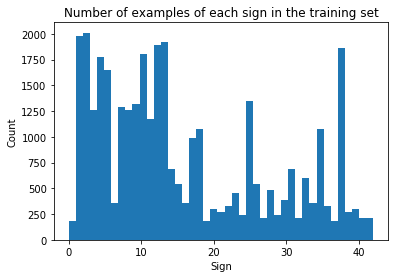

In [5]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

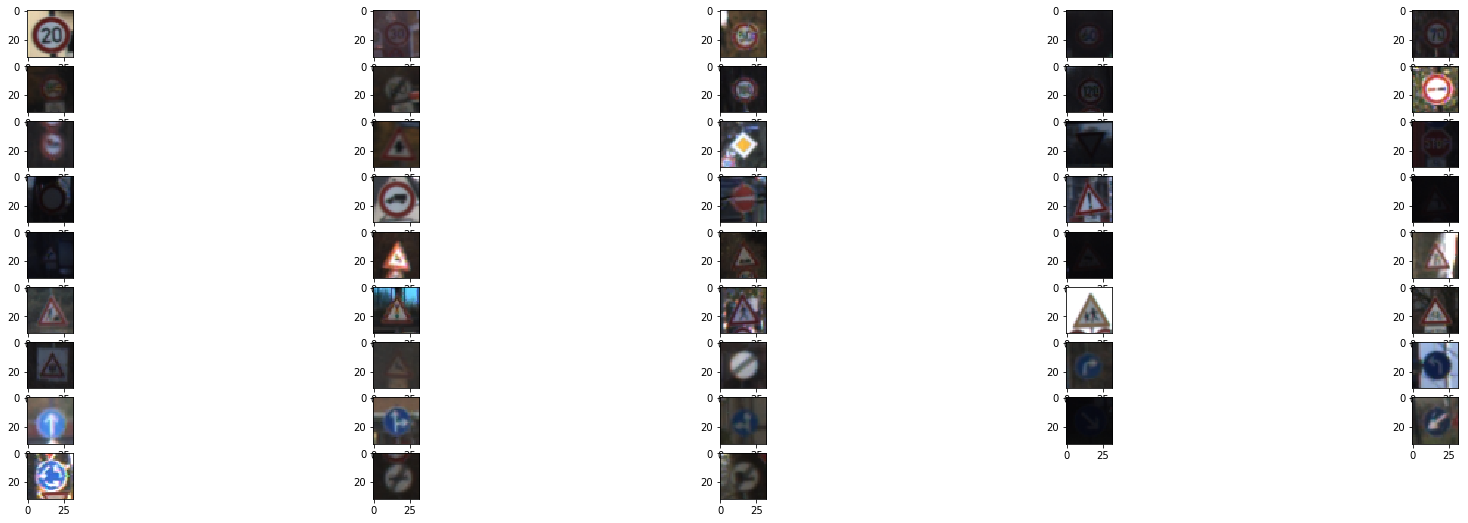

In [6]:
# plot out each traffic sign type
fig=plt.figure(figsize=(30,10))
sign_labels = set(y_train) 
for i in sign_labels: 
    plt.subplot(10,5,i+1) 
    plt.imshow(X_train[y_train == i][0])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [7]:
def rand_brightness(image):
    image=image.astype(np.float32)
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float32)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


# Grayscales an image
def grayscale(img):
    img=img.astype(np.float32)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


# Center Normalize
def center_normalize(data, mean, std):
    """Center normalize images"""
    data = data.astype('float32')
    data -= mean
    data /= std
    return data


# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

# Iterates through grayscale for each image in the data
def preprocess(data):
    gray_images = []
    for image in data:
        image=image.astype(np.float32)
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)



In [9]:
from numpy import newaxis




print('Preprocessing training data...')

X_train_rgb = X_train

# Iterate through grayscale
X_train = preprocess(X_train)
X_train = X_train[..., newaxis]

# Save Gray Scale
X_train_gry = X_train

# Normalize
#X_train = normalize(X_train) 

# Center Normalize
mean = np.mean(X_train)
std = np.std(X_train)
X_train = center_normalize(X_train, mean, std)



print('Finished preprocessing training data.')

# Double-check that the image is changed to depth of 1
image_shape2 = X_train.shape
print("Processed training data shape =", image_shape2)

####################################################
print('Preprocessing validation data...')

# Iterate through grayscale
X_valid = preprocess(X_valid)
X_valid = X_valid[..., newaxis]

# Normalize
#X_valid = normalize(X_valid) 

# Center Normalize
mean = np.mean(X_valid)
std = np.std(X_valid)
X_valid = center_normalize(X_valid, mean, std)

print('Finished preprocessing validation data.')

# Double-check that the image is changed to depth of 1
image_shape4 = X_valid.shape
print("Processed validation data shape =", image_shape4)

####################################################
print('Preprocessing testing data...')

# Iterate through grayscale
X_test = preprocess(X_test)
X_test = X_test[..., newaxis]

# Normalize
#X_test = normalize(X_test) 

# Center Normalize
mean = np.mean(X_test)
std = np.std(X_test)
X_test = center_normalize(X_test, mean, std)

print('Finished preprocessing testing data.')

# Double-check that the image is changed to depth of 1
image_shape3 = X_test.shape
print("Processed testing data shape =", image_shape3)

print('All data preprocessing complete.')

Preprocessing training data...
Finished preprocessing training data.
Processed training data shape = (34799, 32, 32, 1)
Preprocessing validation data...
Finished preprocessing validation data.
Processed validation data shape = (4410, 32, 32, 1)
Preprocessing testing data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 1)
All data preprocessing complete.


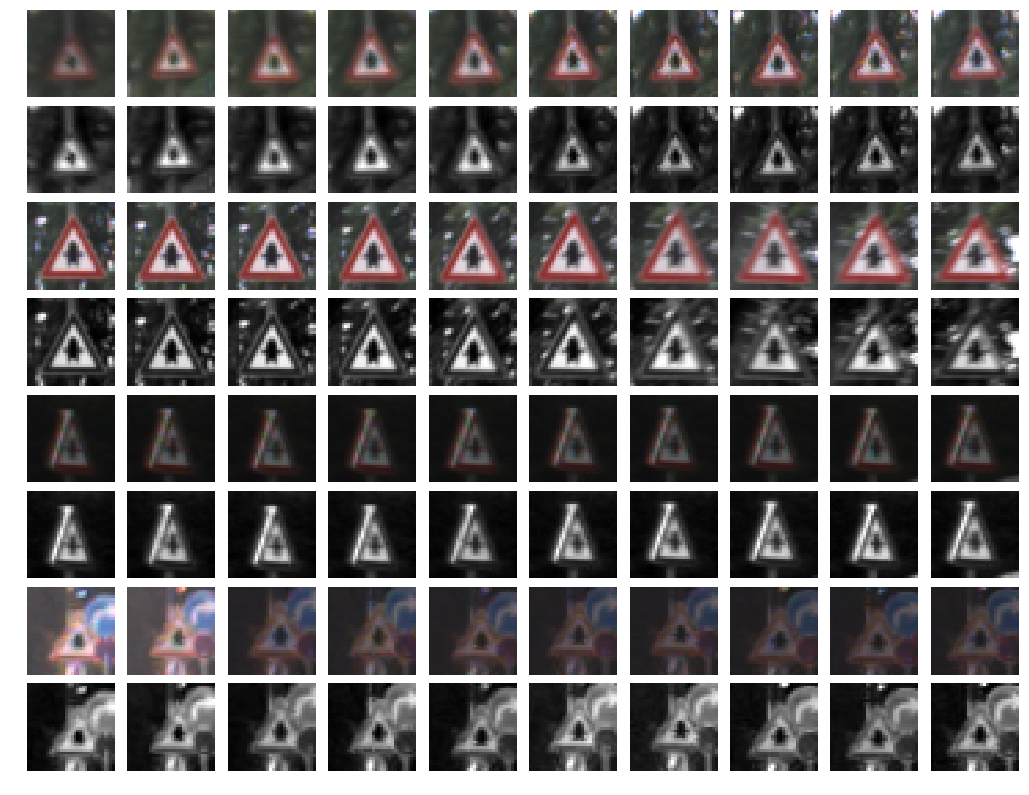

In [10]:
# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        img_bright = rand_brightness(image)
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_gry[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')
        

### Training, Validation and Testing for Model

Generating new data.
Additional data generated. All classes have at least Min_desired data 809 pictures.
The updated number of training examples = 46714


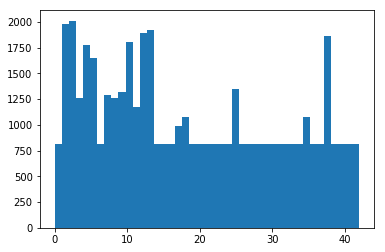

In [11]:
# Generate Additional Data
from scipy import ndimage
import random

# min_desired 
pics_in_class = np.bincount(y_train)
mean_pics = int(np.mean(pics_in_class))
min_desired = int(mean_pics)

print('Generating new data.')

# Angles to be used to rotate images in additional data made
angles = [-25,25, -20,20, -15, 15, -10, 10]

# Iterate through each class
for i in range(len(pics_in_class)):

    # Check if less data than the mean
    if pics_in_class[i] < min_desired:

        # Count how many additional pictures we want
        new_wanted = min_desired - pics_in_class[i]
        picture = np.where(y_train == i)
        more_X = []
        more_y = []
        
             

        # Make the number of additional pictures needed to arrive at the mean
        for num in range(new_wanted):
            # Rotate images and append new ones to more_X, append the class to more_y
            more_X.append(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), reshape=False))
            more_y.append(i)
            
        ###################################################################################    
#            more_X.append(rand_brightness(ndimage.rotate(X_train[picture][random.randint(0,pics_in_class[i] - 1)], random.choice(angles), 
#                                                         reshape=True)))
#            more_y.append(i)

            
        ################################################################################### 
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)

print('Additional data generated. All classes have at least Min_desired data', min_desired, 'pictures.')

plt.hist(y_train, bins = n_classes)

updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)



### High Level Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph()

#EPOCHS = 10
#EPOCHS = 20
#BATCH_SIZE = 150

from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # If not using grayscale, the third number in shape would be 3
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    conv_layer1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias
    
    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias
    
    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    # Here is the main change versus a convolutional layer - matrix multiplication instead of 2D convolution
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias
    
    # Activation 
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5 Fully Connected. Input = 84. Output = 43.
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias
    
    return logits

In [13]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [14]:
# Setting learning rate, loss functions, and optimizer
rate = 0.005

logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
#EPOCHS = 10
EPOCHS = 15
#EPOCHS = 20
#EPOCHS = 22


BATCH_SIZE = 150

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.
import random
from scipy import ndimage
import numpy as np
import sklearn.utils
from sklearn.utils import shuffle
save_file = './train_model_NEW3.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
#    sess.run(tf.initialize_all_variables())
    sess.run(tf.global_variables_initializer())
    
    # Set the logs writer 
    summary_writer = tf.summary.FileWriter('tensorflow_logs', graph_def=sess.graph_def)

    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')

Training...

EPOCH 1 ...
Validation Accuracy = 0.873

EPOCH 2 ...
Validation Accuracy = 0.935

EPOCH 3 ...
Validation Accuracy = 0.934

EPOCH 4 ...
Validation Accuracy = 0.944

EPOCH 5 ...
Validation Accuracy = 0.938

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.947

EPOCH 8 ...
Validation Accuracy = 0.958

EPOCH 9 ...
Validation Accuracy = 0.957

EPOCH 10 ...
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Accuracy = 0.956

EPOCH 12 ...
Validation Accuracy = 0.950

EPOCH 13 ...
Validation Accuracy = 0.949

EPOCH 14 ...
Validation Accuracy = 0.948

EPOCH 15 ...
Validation Accuracy = 0.923

Trained Model Saved.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

My Sign 1 =  No Entry
My Sign 2 =  Stop
My Sign 3 =  60 km/h
My Sign 4 =  Road Work
My Sign 5 =  Wild Animal Crossing


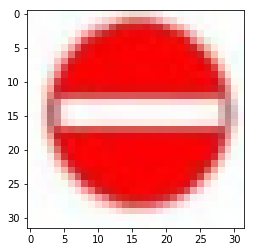

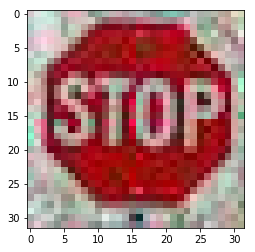

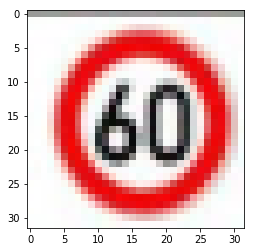

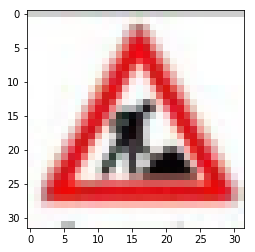

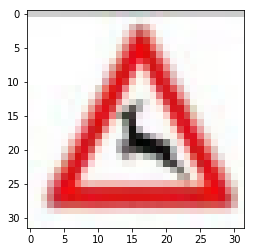

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Importing the images, and let's take a look at what we have!
import os
import matplotlib.image as mpimg
import cv2

my_pics = os.listdir("my_pics/")

#add_pics = new_pics[1:6]
my_pics = my_pics[0:5]

# Show the images, add to a list to process for classifying
my_pics_data = []

for my_pic_counter in range (0,5):  
    if (my_pic_counter == 0):
        print ("My Sign 1 =  No Entry")
    elif (my_pic_counter == 1):
        print ("My Sign 2 =  Stop")
    elif (my_pic_counter == 2):
        print ("My Sign 3 =  60 km/h")
    elif (my_pic_counter == 3):
        print ("My Sign 4 =  Road Work")
    elif (my_pic_counter == 4):
        print ("My Sign 5 =  Wild Animal Crossing")
    my_pic_counter = my_pic_counter + 1            
   
for i in my_pics:
    i = 'my_pics/' + i
    image = mpimg.imread(i)
    my_img = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    my_pics_data.append(my_img)
    plt.imshow(my_img)
    plt.show()

In [19]:
# Launch the model on the test data

with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./train_model_NEW3.ckpt
Test Accuracy: 0.9178944230079651


### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [21]:
# Make into numpy array for processing
my_pics_data = np.array(my_pics_data)

# First, double-check the image shape to make sure it matches the original data's 32x32x3 size
print(my_pics_data.shape)

(5, 32, 32, 3)


In [22]:
print('Preprocessing additional pictures...')

# Iterate through grayscale
my_pics_data = preprocess(my_pics_data)
my_pics_data = my_pics_data[..., newaxis]

# Normalize
my_pics_data = normalize(my_pics_data) 

print('Finished preprocessing additional pictures.')

# Double-check that the image is changed to depth of 1
my_image_shape = my_pics_data.shape
print("Processed additional pictures shape =", my_image_shape)

Preprocessing additional pictures...
Finished preprocessing additional pictures.
Processed additional pictures shape = (5, 32, 32, 1)


### Analyze Performance 
### Calculate the accuracy for these 5 new images.  

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [24]:
# Get Labels from signnames.csv in order to print name of Traffic Signs
#data = np.genfromtxt(path_to_csv, dtype=None, delimiter=',', names=True)
mylabels = np.genfromtxt('signnames.csv', dtype=None, delimiter=',', names=True)

# SoftMax and Top_K=5

INFO:tensorflow:Restoring parameters from ./train_model_NEW3.ckpt




my_5_pics_ground_truth_labels =  [17, 14, 3, 25, 31]
my Pic 1 Top Prediction Correct
my Pic 2 Top Prediction Correct
my Pic 3 Top Prediction Correct
my Pic 4 Top Prediction Correct
my Pic 5 Top Prediction Correct


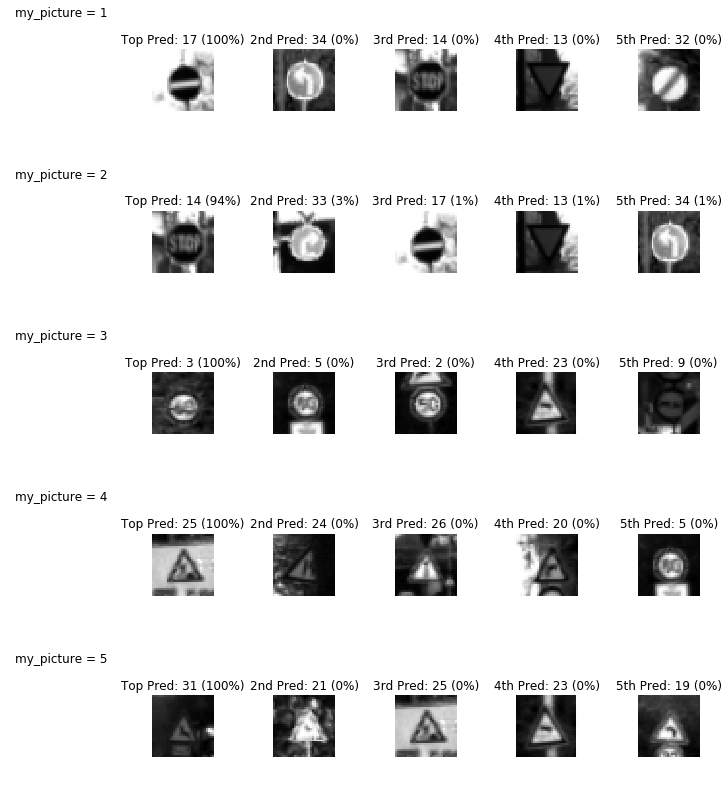

In [52]:
import os
import matplotlib.image as mpimg
import cv2


softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./train_model_NEW3.ckpt.meta')
    saver.restore(sess, "./train_model_NEW3.ckpt")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_pics_data, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_pics_data, keep_prob: 1.0})

#    fig, axs = plt.subplots(len(my_pics),4, figsize=(12, 14))
    fig, axs = plt.subplots(len(my_pics),6, figsize=(12, 14))
#
#    fig.subplots_adjust(hspace = .4, wspace=.2)
    fig.subplots_adjust(hspace = .40, wspace=.96)
    axs = axs.ravel()
########################################################




########################################################    
#    for i, image in enumerate(my_images):
    my_5_pic_labels = [17, 14, 3, 25, 31]
    print ('\n\n\n')
    print ("my_5_pics_ground_truth_labels = ", my_5_pic_labels)
    
    for i, image in enumerate(my_pics_data):
        image=image.astype(np.float32)
        axs[6*i].axis('off')


        my_title = 'my_picture = ' + str(i+1)
        axs[6*i].set_title(my_title)
        predict1 = my_top_k[1][i][0]
        if predict1 == my_5_pic_labels[i]:
            print ("my Pic", i+1, "Top Prediction Correct")
        else:
            print ("my Pic", i+1, "Top Prediction INCORRECT")
        index1 = np.argwhere(y_valid == predict1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('Top Pred: {} ({:.0f}%)'.format(predict1, 100*my_top_k[0][i][0]))
        predict2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == predict2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[6*i+2].set_title('2nd Pred: {} ({:.0f}%)'.format(predict2, 100*my_top_k[0][i][1]))
        predict3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == predict3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[6*i+3].set_title('3rd Pred: {} ({:.0f}%)'.format(predict3, 100*my_top_k[0][i][2])) 
        
        predict4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_valid == predict4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_valid[index4].squeeze(), cmap='gray')
        axs[6*i+4].set_title('4th Pred: {} ({:.0f}%)'.format(predict4, 100*my_top_k[0][i][3])) 
        
        predict5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_valid == predict5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_valid[index5].squeeze(), cmap='gray')
        axs[6*i+5].set_title('5th Pred: {} ({:.0f}%)'.format(predict5, 100*my_top_k[0][i][4])) 